In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
data = pd.read_csv('/content/drive/MyDrive/공빅데_대전_87조/코드 /법정동_데이터셋.csv',encoding ='UTF-8')
df = pd.DataFrame(data)
df1 = df.iloc[:,2:-2]
df1

,택스_승차합,택시_하차합,BUS_정류장_개수,BUS_탑승,BUS_하차,BUS_환승,고령인구 발생량,고령인구 도착량
0,10407,8604,7,534244,443947,239119,886,1018
1,16079,14672,9,109486,90610,22056,391,102
2,6181,6680,7,52783,45757,5595,50,4
3,9901,12841,10,39214,32618,1133,28,7
4,32633,35952,25,181248,168749,10920,218,32
...,...,...,...,...,...,...,...,...
172,0,0,0,0,0,0,0,0
173,0,0,0,0,0,0,0,0
174,24,138,8,898,612,3,1,0
175,45,225,11,2525,1997,5,1,0


In [11]:
df1.columns

Index(['택스_승차합', '택시_하차합', 'BUS_정류장_개수', 'BUS_탑승', 'BUS_하차', 'BUS_환승',
       '고령인구 발생량', '고령인구 도착량'],
      dtype='object')

In [15]:
#정규화 및 PCA진행
features = ['택스_승차합', '택시_하차합', 'BUS_정류장_개수', 'BUS_탑승', 'BUS_하차', 'BUS_환승','고령인구 발생량', '고령인구 도착량']
x = df.loc[:, features].values
x
from sklearn.preprocessing import StandardScaler
x_1 = StandardScaler().fit_transform(x)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_1)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [16]:
principalDf

,principal component 1,principal component 2
0,1.653564,-0.666941
1,-0.562541,-0.109367
2,-1.041438,0.070604
3,-0.928348,-0.025627
4,0.446350,-0.812744
...,...,...
172,-1.556872,0.390648
173,-1.556872,0.390648
174,-1.316824,0.154488
175,-1.222354,0.063876


In [18]:
#원본 데이터 + 주성분 분석 산출물

data = pd.read_csv('/content/drive/MyDrive/공빅데_대전_87조/코드 /법정동_데이터셋.csv',encoding ='UTF-8')
df1 = pd.DataFrame(data)
df2 = pd.concat([df1,principalDf],axis=1)
df2.head()

,법정동,법정동코드,택스_승차합,택시_하차합,BUS_정류장_개수,BUS_탑승,BUS_하차,BUS_환승,고령인구 발생량,고령인구 도착량,교통유동량,버스혼잡도,principal component 1,principal component 2
0,동구 원동,3011010100,10407,8604,7,534244,443947,239119,886,1018,997202,597665.00000,1.653564,-0.666941
1,동구 인동,3011010200,16079,14672,9,109486,90610,22056,391,102,230847,119553.77780,-0.562541,-0.109367
2,동구 효동,3011010300,6181,6680,7,52783,45757,5595,50,4,111401,59319.71429,-1.041438,0.070604
3,동구 천동,3011010400,9901,12841,10,39214,32618,1133,28,7,94574,42475.80000,-0.928348,-0.025627
4,동구 가오동,3011010500,32633,35952,25,181248,168749,10920,218,32,418582,187997.96000,0.446350,-0.812744


Text(7.924999999999997, 0.5, 'y')

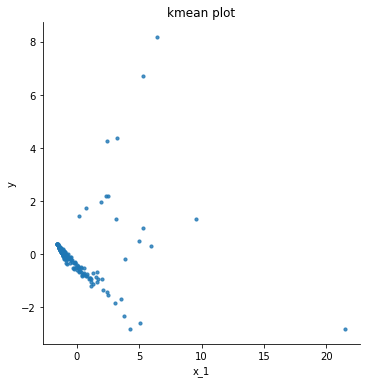

In [19]:
#plot으로 시각화

sns.lmplot('principal component 1', 'principal component 2', data=principalDf, fit_reg=False, scatter_kws={"s": 10})
plt.title('kmean plot')
plt.xlabel('x_1')
plt.ylabel('y')

In [20]:
#주성분 분석 산출물로 DataFrame 추출

data_points = principalDf[['principal component 1', 'principal component 2']]
data_points

,principal component 1,principal component 2
0,1.653564,-0.666941
1,-0.562541,-0.109367
2,-1.041438,0.070604
3,-0.928348,-0.025627
4,0.446350,-0.812744
...,...,...
172,-1.556872,0.390648
173,-1.556872,0.390648
174,-1.316824,0.154488
175,-1.222354,0.063876


In [25]:
#Kmeans 실시.
kmeans = KMeans(n_clusters = 2).fit(data_points)

In [26]:
#Kmeans의 클러스터 개별 값
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=int32)

In [27]:
#KMeans Cluster의 Centroid값만 추출
kmeans.cluster_centers_

array([[-0.60477703, -0.11316484],
       [ 5.34219712,  0.99962271]])

In [28]:
#본 데이터 셋에 Cluster 값을 추가.
df2['cluster_id'] = kmeans.labels_
df2

,법정동,법정동코드,택스_승차합,택시_하차합,BUS_정류장_개수,BUS_탑승,BUS_하차,BUS_환승,고령인구 발생량,고령인구 도착량,교통유동량,버스혼잡도,principal component 1,principal component 2,cluster_id
0,동구 원동,3011010100,10407,8604,7,534244,443947,239119,886,1018,997202,597665.000000,1.653564,-0.666941,0
1,동구 인동,3011010200,16079,14672,9,109486,90610,22056,391,102,230847,119553.777800,-0.562541,-0.109367,0
2,동구 효동,3011010300,6181,6680,7,52783,45757,5595,50,4,111401,59319.714290,-1.041438,0.070604,0
3,동구 천동,3011010400,9901,12841,10,39214,32618,1133,28,7,94574,42475.800000,-0.928348,-0.025627,0
4,동구 가오동,3011010500,32633,35952,25,181248,168749,10920,218,32,418582,187997.960000,0.446350,-0.812744,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,대덕구 부수동,3023012200,0,0,0,0,0,0,0,0,0,0.000000,-1.556872,0.390648,0
173,대덕구 황호동,3023012300,0,0,0,0,0,0,0,0,0,0.000000,-1.556872,0.390648,0
174,대덕구 삼정동,3023012400,24,138,8,898,612,3,1,0,1672,974.500000,-1.316824,0.154488,0
175,대덕구 미호동,3023012500,45,225,11,2525,1997,5,1,0,4792,2706.545455,-1.222354,0.063876,0


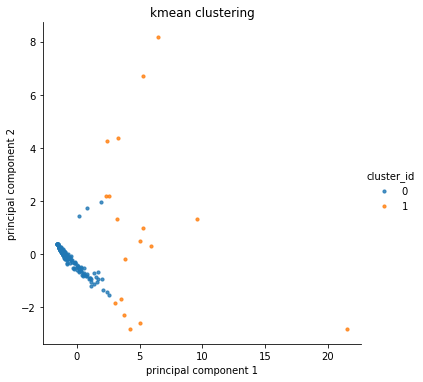

In [30]:
# KMeans Cluster 시각화
sns.lmplot('principal component 1', 'principal component 2', data=df2, fit_reg=False,  
           scatter_kws={"s": 10}, # marker size
           hue="cluster_id") # color

plt.title('kmean clustering')
plt.savefig('군집.png')

In [33]:
#Data의 Cluster값을 개별로 확인
data1 = pd.DataFrame(df2[df2.cluster_id == 0])
data2 = pd.DataFrame(df2[df2.cluster_id == 1])
#df5 = df4.loc[data1,:]

추가적으로 보면 좋을 것들.

In [34]:
data1.describe()

,법정동코드,택스_승차합,택시_하차합,BUS_정류장_개수,BUS_탑승,BUS_하차,BUS_환승,고령인구 발생량,고령인구 도착량,교통유동량,버스혼잡도,principal component 1,principal component 2,cluster_id
count,1.590000e+02,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,1.590000e+02,159.000000,159.000000,159.000000,159.0
mean,3.016956e+09,12958.138365,13491.037736,11.490566,88752.855346,75575.465409,16098.176101,632.962264,585.081761,1.907775e+05,94708.263898,-0.604777,-0.113165,0.0
std,4.380928e+06,19520.941883,19558.502677,7.233771,124188.243464,107366.199632,32993.760526,3999.364191,4139.422404,2.626723e+05,132261.647409,0.976887,0.502180,0.0
min,3.011010e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-1.556872,-1.528116,0.0
25%,3.011014e+09,18.500000,104.000000,6.000000,1569.000000,1558.000000,17.000000,2.000000,0.000000,3.666000e+03,1817.041666,-1.316116,-0.390578,0.0
50%,3.017012e+09,3185.000000,4057.000000,11.000000,28873.000000,25180.000000,1708.000000,19.000000,2.000000,6.105400e+04,30369.555560,-1.016035,0.007687,0.0
75%,3.020014e+09,19591.000000,21374.000000,16.000000,152363.000000,118584.000000,16544.000000,131.500000,17.000000,3.037475e+05,162206.575750,-0.084513,0.203831,0.0
max,3.023013e+09,113552.000000,99585.000000,33.000000,555205.000000,524303.000000,239119.000000,37636.000000,38256.000000,1.126764e+06,619607.428600,2.518221,1.976581,0.0


# 새 섹션

In [35]:
data2.describe()

,법정동코드,택스_승차합,택시_하차합,BUS_정류장_개수,BUS_탑승,BUS_하차,BUS_환승,고령인구 발생량,고령인구 도착량,교통유동량,버스혼잡도,principal component 1,principal component 2,cluster_id
count,1.800000e+01,18.000000,18.000000,18.000000,1.800000e+01,1.800000e+01,18.000000,18.000000,18.000000,1.800000e+01,1.800000e+01,18.000000,18.000000,18.0
mean,3.015678e+09,108802.000000,104094.722222,30.000000,6.198643e+05,5.330236e+05,166828.111111,40918.611111,41174.388889,1.365785e+06,6.397964e+05,5.342197,0.999623,1.0
std,3.446962e+06,82976.372872,82177.164311,17.067341,5.243687e+05,4.611990e+05,168507.110106,35432.307471,35803.547541,1.134844e+06,5.281543e+05,4.404497,3.247449,0.0
min,3.011011e+09,31547.000000,31008.000000,6.000000,1.612550e+05,1.144300e+05,19421.000000,348.000000,19.000000,3.820740e+05,1.739694e+05,2.355617,-2.830166,1.0
25%,3.014010e+09,59613.750000,51967.500000,17.750000,3.765508e+05,2.826045e+05,89254.500000,6058.750000,5982.000000,7.828375e+05,3.917563e+05,3.201717,-1.808016,1.0
50%,3.017010e+09,79779.500000,81335.500000,28.000000,5.106045e+05,4.562505e+05,113848.000000,37483.000000,37930.000000,1.174234e+06,5.250167e+05,4.043151,0.749971,1.0
75%,3.017011e+09,132985.750000,126949.000000,35.750000,6.615882e+05,5.083812e+05,157926.000000,61679.500000,61804.250000,1.412750e+06,6.844100e+05,5.288609,2.175171,1.0
max,3.023010e+09,381207.000000,385474.000000,72.000000,2.543725e+06,2.223617e+06,763494.000000,120483.000000,123167.000000,5.534023e+06,2.574609e+06,21.507055,8.172809,1.0


In [36]:
data1.columns

Index(['법정동', '법정동코드', '택스_승차합', '택시_하차합', 'BUS_정류장_개수', 'BUS_탑승', 'BUS_하차',
       'BUS_환승', '고령인구 발생량', '고령인구 도착량', '교통유동량', '버스혼잡도',
       'principal component 1', 'principal component 2', 'cluster_id'],
      dtype='object')

In [ ]:
# list = data1['택스_승차합', '택시_하차합', 'BUS_정류장_개수', 'BUS_탑승', 'BUS_하차',
#        'BUS_환승', '고령인구 발생량', '고령인구 도착량']

# for i in list :
#   Q1 = data1[i].quantile(0.25)
#   Q3 = data1[i].Quantile(0.75)
#   IQR = Q3 - Q1

# data2 = data1[ (data1[a] < Q1-1.5*IQR) | (data1[a] > Q3 + 1.5 * IQR)].index
# data1.drop(data2,inplace = True)
# data1

In [ ]:
a=pd.Series(data2['BUS_하차']).sort_values(ascending=False)
b=a.reset_index()
#1451.250000 0.25
#104624.000000 0.75

# b[b.BUS_하차>1451] & b[b.BUS_하차<104624]
#(b['BUS_하차']>1451 and b['BUS_하차']<104624)
c= b[b['BUS_하차']>1451]
c  

,index,BUS_하차
0,108,862566
1,73,708616
2,60,640948
3,80,510854
4,49,500963
5,85,487723
6,151,485582
7,119,482481
8,82,456778
9,76,455723


In [ ]:
#df5.to_csv('주요_법정동.csv', index=False, encoding='cp949')
data2.shape

(22, 15)